# Linear Regression for Wealth Index of Women

## 1. Load Data

In [1]:
import pandas as pd
df = pd.read_csv("data/WomenDHS.csv")
df

ModuleNotFoundError: No module named 'pandas'

In [ ]:
df.shape # (rows, columns) = (num vars, num obs)

(15683, 8)

## 2. Exploratory data analysis (EDA)

In [ ]:
df.head()

,UniqueID,Residence,Education,HouseHeadSex,Age,NumChild,WealthIndexOriginal,WealthIndex
0,1,Rural,No Education,Male,38,8,-51074,162269
1,2,Rural,Incomplete Primary,Male,17,0,-51074,162269
2,3,Rural,Incomplete Primary,Male,42,6,-50742,162601
3,4,Rural,No Education,Male,46,9,-50137,163206
4,5,Rural,No Education,Male,17,1,-50137,163206


In [ ]:
df.head(10)

,UniqueID,Residence,Education,HouseHeadSex,Age,NumChild,WealthIndexOriginal,WealthIndex
0,1,Rural,No Education,Male,38,8,-51074,162269
1,2,Rural,Incomplete Primary,Male,17,0,-51074,162269
2,3,Rural,Incomplete Primary,Male,42,6,-50742,162601
3,4,Rural,No Education,Male,46,9,-50137,163206
4,5,Rural,No Education,Male,17,1,-50137,163206
5,6,Rural,No Education,Female,31,4,-53785,159558
6,7,Rural,No Education,Female,36,3,-2828,210515
7,8,Rural,No Education,Male,31,5,-57173,156170
8,9,Rural,No Education,Female,23,2,-64141,149202
9,10,Rural,Incomplete Primary,Male,17,0,-37343,176000


In [ ]:
df.tail()

,UniqueID,Residence,Education,HouseHeadSex,Age,NumChild,WealthIndexOriginal,WealthIndex
15678,15679,Urban,Incomplete Primary,Male,17,0,85862,299205
15679,15680,Urban,No Education,Male,33,2,147305,360648
15680,15681,Urban,Incomplete Primary,Male,25,1,186851,400194
15681,15682,Urban,Incomplete Primary,Male,18,0,186851,400194
15682,15683,Urban,Incomplete Secondary,Male,21,0,87711,301054


In [ ]:
df.isna().sum() # missing values?

UniqueID               0
Residence              0
Education              0
HouseHeadSex           0
Age                    0
NumChild               0
WealthIndexOriginal    0
WealthIndex            0
dtype: int64

In [ ]:
df.info() # datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15683 entries, 0 to 15682
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   UniqueID             15683 non-null  int64 
 1   Residence            15683 non-null  object
 2   Education            15683 non-null  object
 3   HouseHeadSex         15683 non-null  object
 4   Age                  15683 non-null  int64 
 5   NumChild             15683 non-null  int64 
 6   WealthIndexOriginal  15683 non-null  int64 
 7   WealthIndex          15683 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 980.3+ KB


In [ ]:
## Number of catgorical and numerical features
categirical_features = [f for f in df.columns if df[f].dtype == "O"] # "O" -> Object
num_categirical_features = len(categirical_features)
numeric_features = [f for f in df.columns if df[f].dtype != "O"]
num_numeric_features = len(numeric_features)

print(num_categirical_features, categirical_features)
print(num_numeric_features, numeric_features)

3 ['Residence', 'Education', 'HouseHeadSex']
5 ['UniqueID', 'Age', 'NumChild', 'WealthIndexOriginal', 'WealthIndex']


In [ ]:
categorical_features = df.select_dtypes(include="object").columns
print(categorical_features)
numeric_features = df.select_dtypes(exclude="object").columns
print(numeric_features)

Index(['Residence', 'Education', 'HouseHeadSex'], dtype='object')
Index(['UniqueID', 'Age', 'NumChild', 'WealthIndexOriginal', 'WealthIndex'], dtype='object')


In [ ]:
df.duplicated(subset=['UniqueID']).sum() ## duplicates?

0

In [ ]:
df.nunique() # unique values

UniqueID               15683
Residence                  2
Education                  6
HouseHeadSex               2
Age                       35
NumChild                  13
WealthIndexOriginal    11935
WealthIndex            11935
dtype: int64

In [ ]:
df.Residence.value_counts()

Rural    10335
Urban     5348
Name: Residence, dtype: int64

In [ ]:
df.Residence.value_counts(normalize=True)

Rural    0.658994
Urban    0.341006
Name: Residence, dtype: float64

<Axes: >

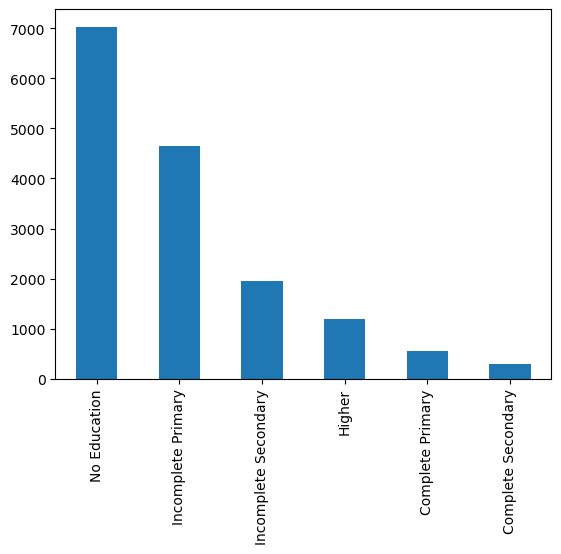

In [ ]:
df.Education.value_counts().plot(kind="bar")

In [ ]:
df.describe() # descriptives

,UniqueID,Age,NumChild,WealthIndexOriginal,WealthIndex
count,15683.000000,15683.000000,15683.000000,15683.000000,15683.000000
mean,7842.000000,27.937321,2.325639,10621.310209,223964.310209
std,4527.436471,9.159282,2.472988,105301.347989,105301.347989
min,1.000000,15.000000,0.000000,-213343.000000,0.000000
25%,3921.500000,20.000000,0.000000,-61526.500000,151816.500000
50%,7842.000000,27.000000,2.000000,-33659.000000,179684.000000
75%,11762.500000,35.000000,4.000000,88720.000000,302063.000000
max,15683.000000,49.000000,12.000000,309962.000000,523305.000000


### Histogram and KDE

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

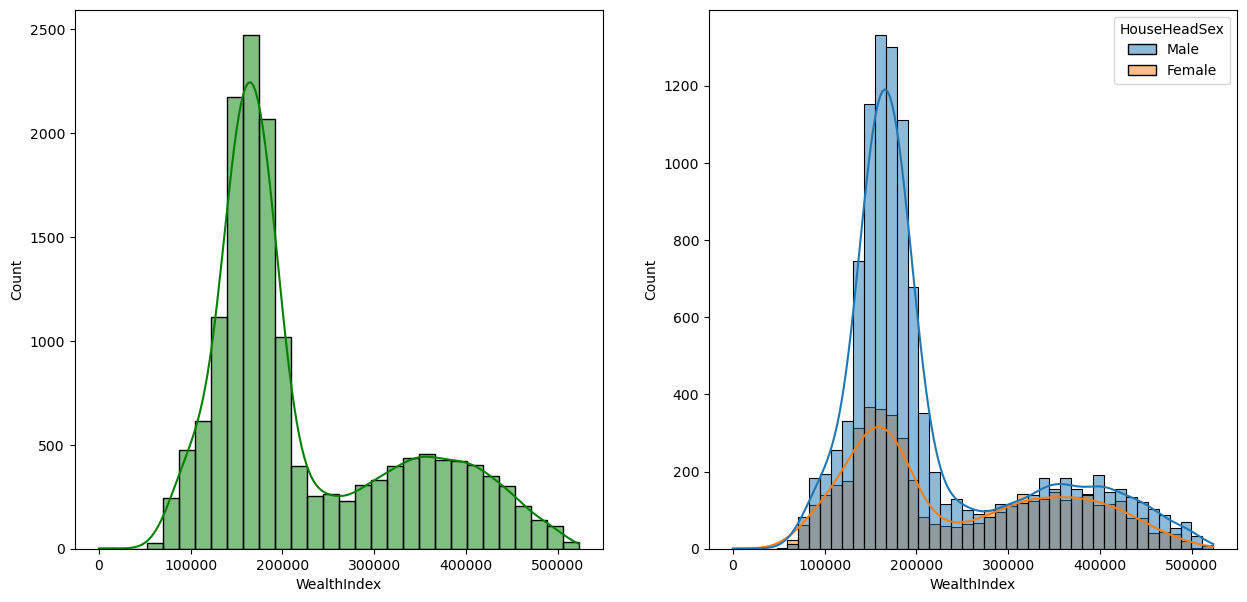

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='WealthIndex', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='WealthIndex', kde=True, hue='HouseHeadSex')
plt.show()

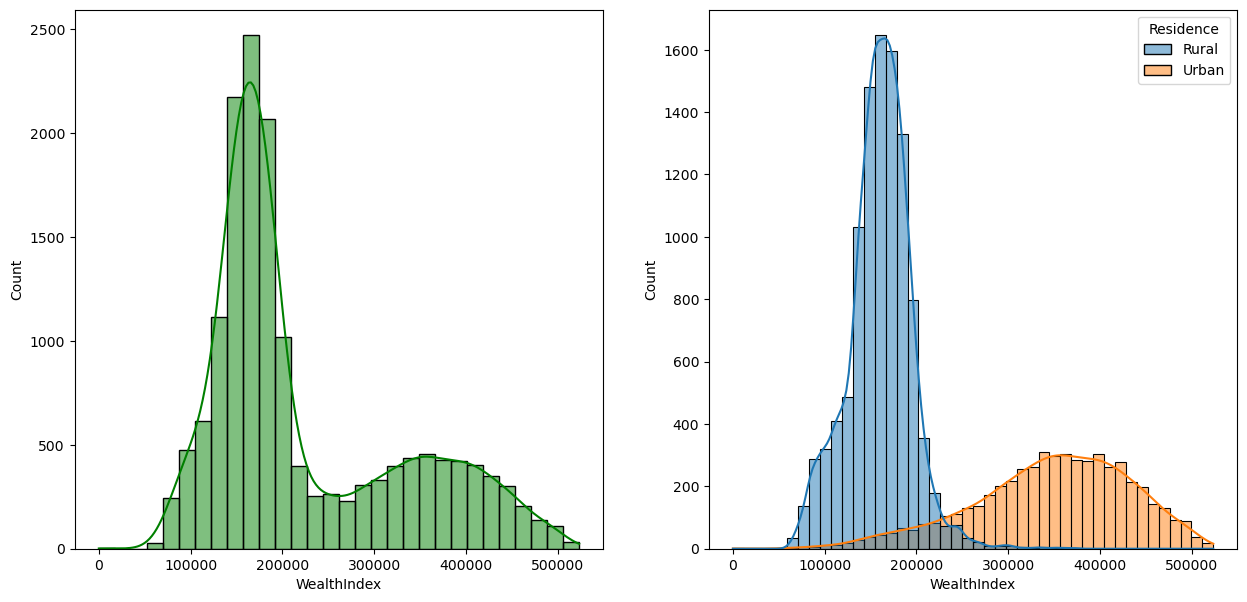

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='WealthIndex', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='WealthIndex', kde=True, hue='Residence')
plt.show()

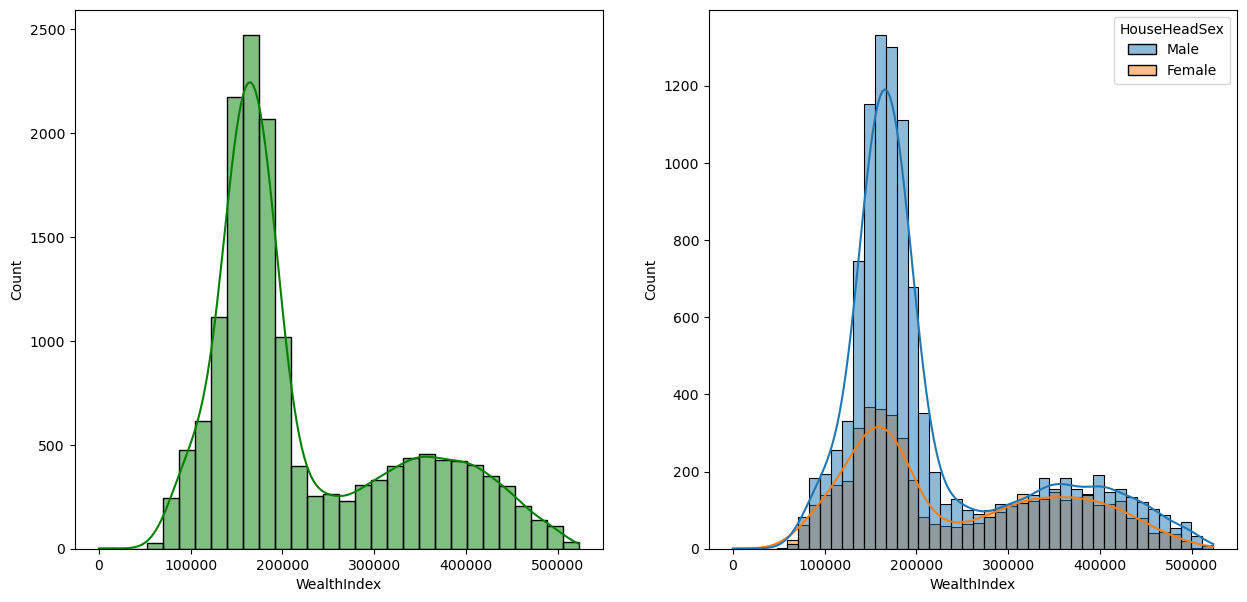

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='WealthIndex', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='WealthIndex', kde=True, hue='HouseHeadSex')
plt.show()

## 3. Train-Test Split

In [ ]:
X = df.drop(columns=["UniqueID", "WealthIndexOriginal", "WealthIndex"])
X

,Residence,Education,HouseHeadSex,Age,NumChild
0,Rural,No Education,Male,38,8
1,Rural,Incomplete Primary,Male,17,0
2,Rural,Incomplete Primary,Male,42,6
3,Rural,No Education,Male,46,9
4,Rural,No Education,Male,17,1
...,...,...,...,...,...
15678,Urban,Incomplete Primary,Male,17,0
15679,Urban,No Education,Male,33,2
15680,Urban,Incomplete Primary,Male,25,1
15681,Urban,Incomplete Primary,Male,18,0


In [ ]:
y = df["WealthIndex"]
y

0        162269
1        162269
2        162601
3        163206
4        163206
          ...  
15678    299205
15679    360648
15680    400194
15681    400194
15682    301054
Name: WealthIndex, Length: 15683, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42
)
X_train.shape, X_test.shape

((12546, 5), (3137, 5))

## 4. Feature Transformations

In [ ]:
cat_features = X_train.select_dtypes(include="object").columns
num_features = X_train.select_dtypes(exclude="object").columns

In [ ]:
cat_features, num_features

(Index(['Residence', 'Education', 'HouseHeadSex'], dtype='object'),
 Index(['Age', 'NumChild'], dtype='object'))

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [ ]:
numeric_transformer = StandardScaler()
onehot_transformer = OneHotEncoder()
print(numeric_transformer, onehot_transformer)

StandardScaler() OneHotEncoder()


In [ ]:
preprocessor = ColumnTransformer([
    ("OneHotEncoder", onehot_transformer, cat_features),
    ("StandardScaler", numeric_transformer, num_features)
    ])

In [ ]:
X_train = preprocessor.fit_transform(X_train)
X_train

array([[ 0.        ,  1.        ,  0.        , ...,  1.        ,
        -0.86742759, -0.94017478],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.3239574 ,  3.1036501 ],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.3239574 ,  1.48612015],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
         0.2282649 ,  0.67735517],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
        -1.08656609, -0.94017478],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.77611115,  1.48612015]])

In [ ]:
X_train.shape

(12546, 12)

In [ ]:
X_test = preprocessor.transform(X_test)
X_test

array([[ 1.        ,  0.        ,  0.        , ...,  0.        ,
        -0.64828909,  0.67735517],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
        -0.21001209, -0.1314098 ],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.21438815,  1.48612015],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  1.        ,
         0.99524965,  2.29488513],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.2282649 ,  0.27297268],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
         1.5430959 , -0.1314098 ]])

## 5. Train Model

In [ ]:
%%capture
!pip install catboost

In [ ]:
%%capture
!pip install xgboost

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(actual, predicted):
    MAE = mean_absolute_error(actual, predicted)
    MSE = mean_squared_error(actual, predicted)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(actual, predicted)    
    return MAE, MSE, RMSE, R2

In [ ]:
models_dict = {
    "Linear" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "ElasticNet" : ElasticNet(),
    "K-Neighbors" : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest" : RandomForestRegressor(),
    "XGBoost" : XGBRegressor(),
    "CatBoosting" : CatBoostRegressor(verbose=False),
    "AdaBoost": AdaBoostRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

In [ ]:
num_models = len(models_dict)
model_type = list(models_dict.keys())
model_type

['Linear',
 'Lasso',
 'Ridge',
 'ElasticNet',
 'K-Neighbors',
 'Decision Tree',
 'Random Forest',
 'XGBoost',
 'CatBoosting',
 'AdaBoost',
 'Gradient Boosting']

In [ ]:
name_models = list(models_dict.values())
name_models

[LinearRegression(),
 Lasso(),
 Ridge(),
 ElasticNet(),
 KNeighborsRegressor(),
 DecisionTreeRegressor(),
 RandomForestRegressor(),
 XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...),
 AdaBoostRegressor(),
 GradientBoostingRegressor()]

In [ ]:
def train_model(models, X_train, X_test, y_train, y_test):
    model_scores = {
        "Model": [],
        "Train_MAE": [],
        "Train_RMSE": [],
        "Train_R2": [],
        "Test_MAE": [],
        "Test_RMSE": [],
        "Test_R2": [],  
    }
    
    for model_name, model in models_dict.items():
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        train_mae, _, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)
        test_mae, _, test_rmse, test_r2 = evaluate_model(y_test, y_test_pred)
        
        model_scores["Model"].append(model_name)
        model_scores["Train_MAE"].append(train_mae)
        model_scores["Train_RMSE"].append(train_rmse)
        model_scores["Train_R2"].append(train_r2)

        model_scores["Test_MAE"].append(test_mae)
        model_scores["Test_RMSE"].append(test_rmse)
        model_scores["Test_R2"].append(test_r2)
        
    model_scores_df = pd.DataFrame(model_scores)
    return model_scores_df

In [ ]:
import numpy as np
train_model(models_dict, X_train, X_test, y_train, y_test)

,Model,Train_MAE,Train_RMSE,Train_R2,Test_MAE,Test_RMSE,Test_R2
0,Linear,36785.496652,51902.289408,0.757744,36888.337265,52596.020122,0.747511
1,Lasso,36783.896019,51902.170035,0.757745,36886.919614,52597.909899,0.747493
2,Ridge,36784.417981,51902.175954,0.757745,36887.543558,52597.954617,0.747493
3,ElasticNet,52466.181266,68188.771340,0.581855,52798.626570,68222.010557,0.575199
4,K-Neighbors,35120.039837,49612.568957,0.778647,38166.111954,54195.173613,0.731924
5,Decision Tree,29470.203250,43299.705532,0.831395,38958.375069,56140.391198,0.712335
6,Random Forest,30850.200927,43925.667797,0.826484,37317.066056,53441.058020,0.739333
7,XGBoost,32222.242354,45869.777807,0.810785,36273.512425,51903.821304,0.754114
8,CatBoosting,33188.102361,47043.549807,0.800978,35704.318032,50944.136099,0.763122
9,AdaBoost,37275.017398,52260.461228,0.754389,37592.133547,53080.554181,0.742838


In [ ]:
model_scores_df = train_model(models_dict, X_train, X_test, y_train, y_test)
model_scores_df.sort_values(by=["Test_R2"],ascending=False)

,Model,Train_MAE,Train_RMSE,Train_R2,Test_MAE,Test_RMSE,Test_R2
10,Gradient Boosting,34872.557160,49473.681023,0.779885,35576.511378,50711.927717,0.765277
8,CatBoosting,33188.102361,47043.549807,0.800978,35704.318032,50944.136099,0.763122
7,XGBoost,32222.242354,45869.777807,0.810785,36273.512425,51903.821304,0.754114
0,Linear,36785.496652,51902.289408,0.757744,36888.337265,52596.020122,0.747511
1,Lasso,36783.896019,51902.170035,0.757745,36886.919614,52597.909899,0.747493
2,Ridge,36784.417981,51902.175954,0.757745,36887.543558,52597.954617,0.747493
9,AdaBoost,37523.174568,52609.866810,0.751094,37599.651126,53055.052235,0.743085
6,Random Forest,30839.793195,43899.792477,0.826689,37325.223252,53385.654202,0.739873
4,K-Neighbors,35120.039837,49612.568957,0.778647,38166.111954,54195.173613,0.731924
5,Decision Tree,29470.203250,43299.705532,0.831395,38941.357217,56145.058166,0.712287


## 6. Tune Hyperparameters

A validation set can be used to test different hyperparameters.

Manual tuning gradient boosting model

In [ ]:
def train_gb_model(X_train, X_test, y_train, y_test, lr_list):
    model = GradientBoostingRegressor()
    model_scores = {
        "LR": [],
        "Train_MAE": [],
        "Train_RMSE": [],
        "Train_R2": [],
        "Test_MAE": [],
        "Test_RMSE": [],
        "Test_R2": [],  
    }
    
    for lr in lr_list:
        model.set_params(learning_rate=lr)
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        train_mae, _, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)
        test_mae, _, test_rmse, test_r2 = evaluate_model(y_test, y_test_pred)
        
        model_scores["LR"].append(lr)
        model_scores["Train_MAE"].append(train_mae)
        model_scores["Train_RMSE"].append(train_rmse)
        model_scores["Train_R2"].append(train_r2)

        model_scores["Test_MAE"].append(test_mae)
        model_scores["Test_RMSE"].append(test_rmse)
        model_scores["Test_R2"].append(test_r2)
        
    model_scores_df = pd.DataFrame(model_scores)
    return model_scores_df

In [ ]:
lr_list = np.arange(0.01, 1, 0.01)
gb_scores = train_gb_model(X_train, X_test, y_train, y_test, lr_list)
gb_scores

,LR,Train_MAE,Train_RMSE,Train_R2,Test_MAE,Test_RMSE,Test_R2
0,0.01,46135.082950,61817.725656,0.656341,46262.938174,62003.124623,0.649116
1,0.02,37642.714804,52707.581327,0.750168,38025.079204,53455.700037,0.739190
2,0.03,36055.218183,50913.855509,0.766883,36495.722826,51850.206530,0.754621
3,0.04,35539.087462,50288.408936,0.772575,35972.256134,51256.819623,0.760205
4,0.05,35287.346604,50003.683618,0.775143,35779.675227,51022.247427,0.762395
...,...,...,...,...,...,...,...
94,0.95,34066.436983,48319.265296,0.790037,36064.753633,51227.193994,0.760483
95,0.96,34104.928904,48289.587557,0.790295,36041.808954,51201.141207,0.760726
96,0.97,33990.325835,48290.569730,0.790287,35936.918850,51135.519981,0.761339
97,0.98,34053.649451,48289.746261,0.790294,36060.178777,51165.912513,0.761055


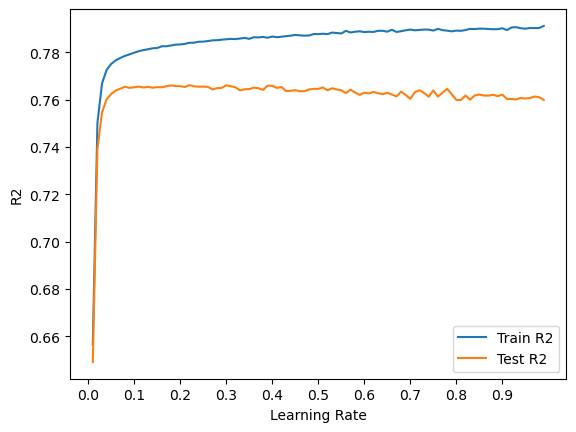

In [ ]:
plt.plot(gb_scores["LR"], gb_scores["Train_R2"], label="Train R2")
plt.plot(gb_scores["LR"], gb_scores["Test_R2"], label="Test R2")
plt.xticks(np.arange(0., 1, 0.1))
plt.xlabel("Learning Rate")
plt.ylabel("R2")
plt.legend();

In [ ]:
gb_scores.sort_values(by=["Test_R2"],ascending=False)

,LR,Train_MAE,Train_RMSE,Train_R2,Test_MAE,Test_RMSE,Test_R2
21,0.22,34570.198800,49001.595102,0.784065,35541.853112,50618.751475,0.766138
29,0.30,34441.782097,48834.698684,0.785534,35589.581805,50626.521604,0.766067
17,0.18,34649.458177,49128.296969,0.782947,35559.103368,50630.173242,0.766033
38,0.39,34363.449237,48759.639651,0.786193,35650.185510,50639.596832,0.765946
39,0.40,34342.147021,48701.448641,0.786703,35712.902845,50652.765759,0.765824
...,...,...,...,...,...,...,...
79,0.80,34027.768611,48414.718376,0.789207,36071.034985,51290.415295,0.759891
80,0.81,34111.951245,48425.437193,0.789114,36056.058077,51291.952240,0.759877
2,0.03,36055.218183,50913.855509,0.766883,36495.722826,51850.206530,0.754621
1,0.02,37642.714804,52707.581327,0.750168,38025.079204,53455.700037,0.739190


### Cross Validation

In [ ]:
gradboost_params = {
    'learning_rate':[0.1, 0.01, 0.05, 0.001],
    'subsample':[0.6, 0.7, 0.75, 0.8, 0.85, 0.9],
    'n_estimators': [8, 16, 32, 64, 128, 256]
    }

catboost_params = {
    'depth': [6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [30, 50, 100]
    }


In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

Setup grid search hyperparameters

In [ ]:
model = GradientBoostingRegressor()
grid_search = GridSearchCV(model,
                           param_grid=gradboost_params,
                           cv=5,
                           verbose=True)
grid_search.fit(X_train, y_train) 
grid_search.best_params_

Fitting 5 folds for each of 144 candidates, totalling 720 fits


{'learning_rate': 0.05, 'n_estimators': 256, 'subsample': 0.6}

In [ ]:
model.set_params(**grid_search.best_params_)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
train_mae, train_mse, train_rmse, train_r2 = evaluate_model(y_train_pred, y_train)
test_mae, test_mse, test_rmse, test_r2 = evaluate_model(y_test_pred, y_test)
print("train_mae, train_mse, train_rmse, train_r2:", train_mae, train_mse, train_rmse, train_r2)
print("test_mae, test_mse, test_rmse, test_r2:", test_mae, test_mse, test_rmse, test_r2)

train_mae, train_mse, train_rmse, train_r2: 34723.52400069268 2423854501.0838685 49232.656855829635 0.7191567477254142
test_mae, test_mse, test_rmse, test_r2: 35493.365810978 2553396487.114214 50531.143734475416 0.7035504415984802


Setup random search hyperparameters

In [ ]:
model = GradientBoostingRegressor()
random_search = RandomizedSearchCV(model,
                                   param_distributions=gradboost_params,
                                   cv=5,
                                   n_iter=20,
                                   verbose=True)
random_search.fit(X_train, y_train) 
random_search.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'subsample': 0.6, 'n_estimators': 256, 'learning_rate': 0.05}

In [ ]:
model = GradientBoostingRegressor()
random_search = RandomizedSearchCV(model,
                                 param_distributions=gradboost_params,
                                 cv=5,
                                 n_iter=20,
                                 verbose=True)
random_search.fit(X_train, y_train) 
random_search.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'subsample': 0.7, 'n_estimators': 256, 'learning_rate': 0.05}